## PROBLEM STATEMENT

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## ANALYSIS FOR GIVEN DATASET AND PROBLEM STATEMENT

### STEP 1: READING AND UNDERSTANDING DATA

In [2]:
# Standard libraries

import pandas as pd
import numpy as np


# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
df_country=pd.read_csv(r"C:\Users\Ankita Rath\Downloads\PCA_Clustering_Assignment\Country-data.csv")

In [4]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Firstly we need to find the number of null values in the given dataset. 
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
# % of null values in the dataset
round(100*(df_country.isnull().sum()/len(df_country.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- All columns are not having null values and except country rest all are integer or float columns

In [7]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
df_countries=df_country['country']
df_columns=df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

### CHECKING FOR OUTLIERS

In [9]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df_country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


- As we can see that there are gradual change in the outliers and also not to loose minimum and maximum values as it have a specific identification which would be used for identification of backward countries

### EDA

- Column description:
    - Child Mortality Rate : Death of children under 5 years of age per 1000
    - Fertility Rate: Children that would be born to each women.
    - Life Expectancy: If the current mortality remains same, a new born child would remain alive
    - Health : Health as % of total GDP
    - The GDP per capita(gdpp) : GDP / Total population
    - Per capita Income : Net income per person
    - Inflation: Annual growth rate of the Total GDP
    - Exports: Exports of goods and services.
    - Imports: Imports of goods and services. 

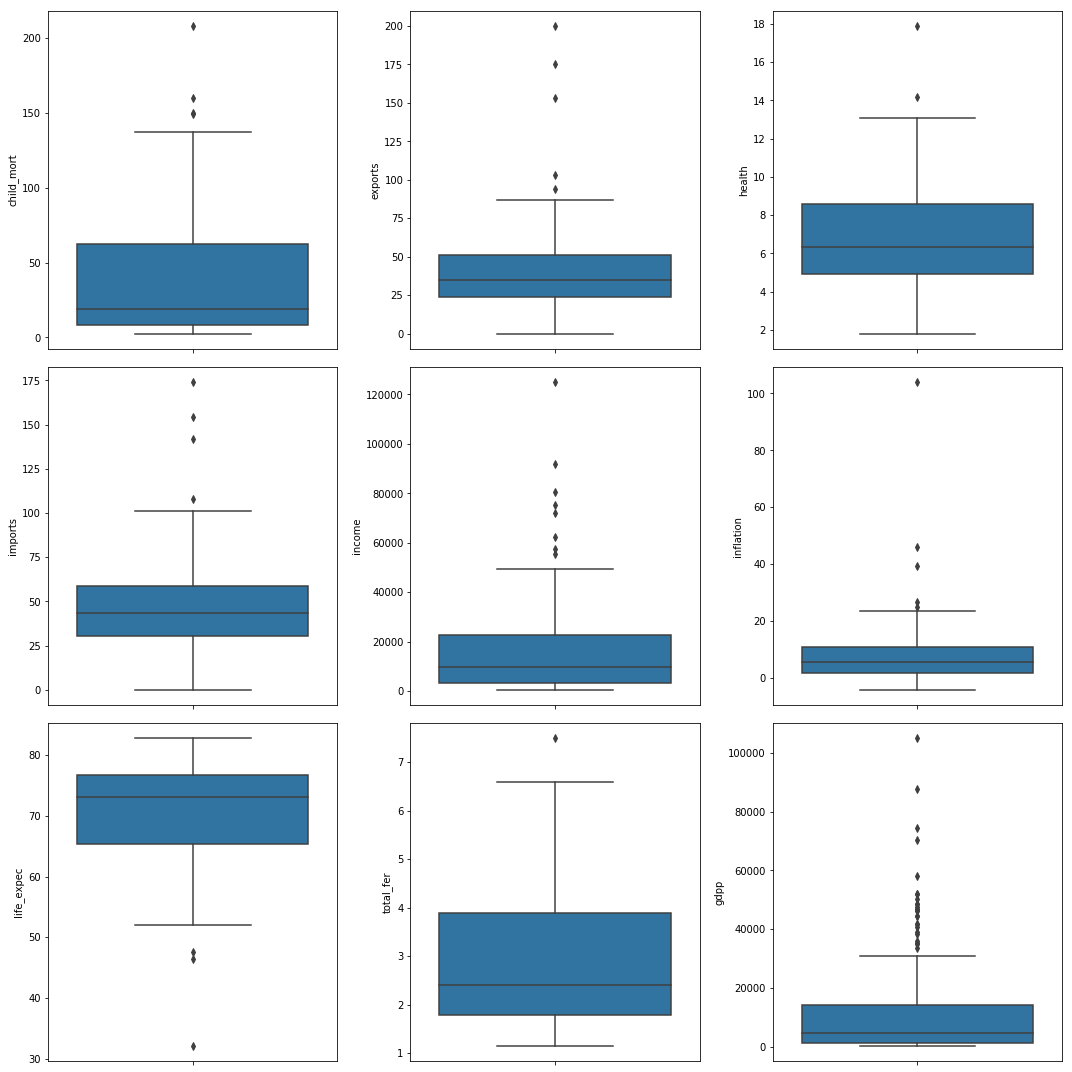

In [10]:
# UNIVARIATE ANALYSIS

## Code to run all the box plot for all numerical columns in the given dataset

fig, axis = plt.subplots(3,3,figsize = (15,15))

j=0
k=0
for i in df_columns:
    plt_columns=sns.boxplot(y=df_country[i],ax=axis[j,k])
    plt_columns.set(xlabel = '', ylabel= i)
    plt.show
    k+=1
    if k==3:
        j+=1
        k=0
        
plt.tight_layout()
plt.savefig('eda')
plt.show()

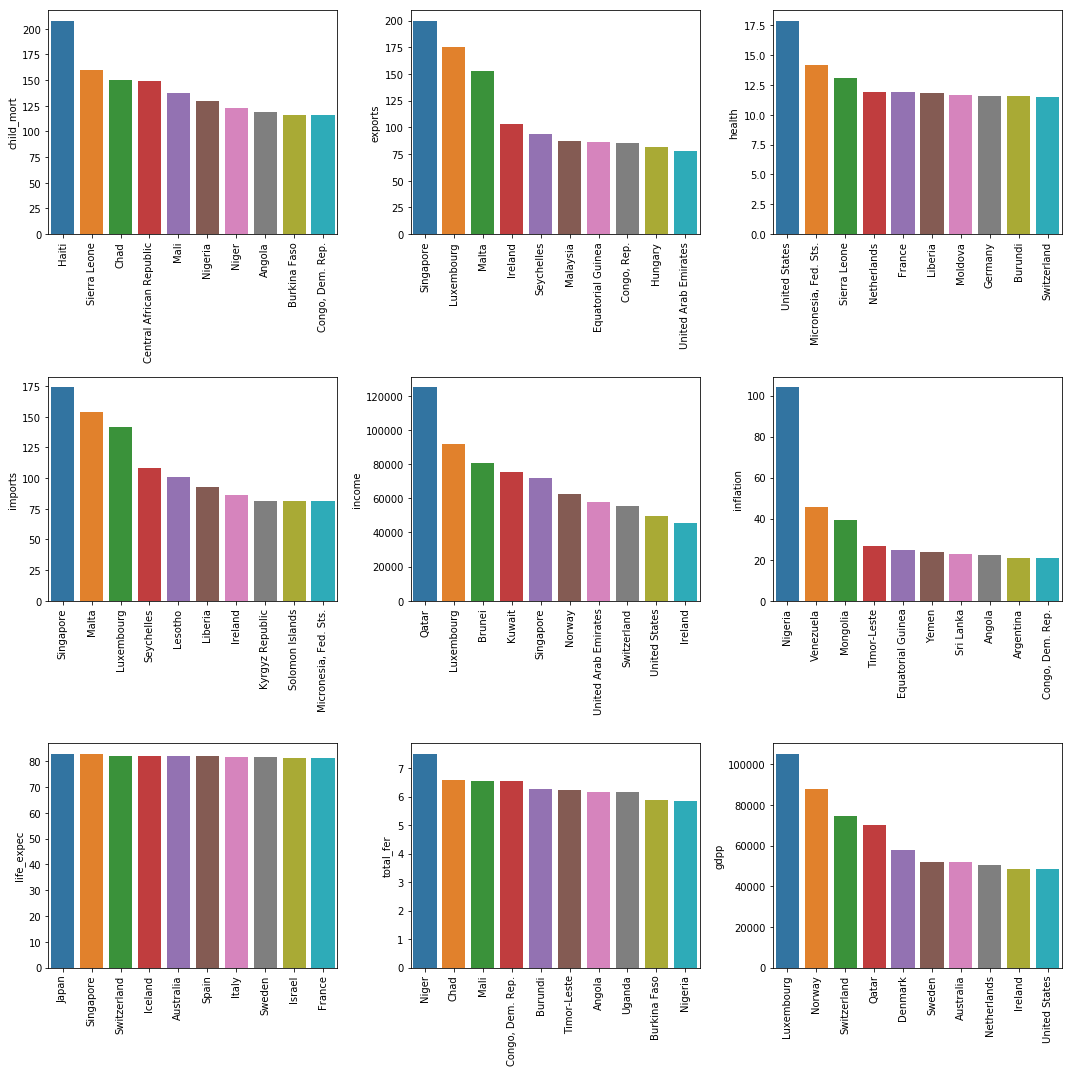

In [11]:
## Bivariate Analysis on all columns with country.

fig, axs = plt.subplots(3,3,figsize = (15,15))

j=0
k=0
for i in df_columns:
    df_bivariate = df_country[['country',i]].sort_values(i, ascending = False).head(10)
    plt1 = sns.barplot(x='country', y=i, data= df_bivariate,ax=axs[j,k])
    plt1.set(xlabel = '', ylabel= i)
    plt.show
    k+=1
    if k==3:
        j+=1
        k=0
        
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

- These plots are having higher values for all columns.

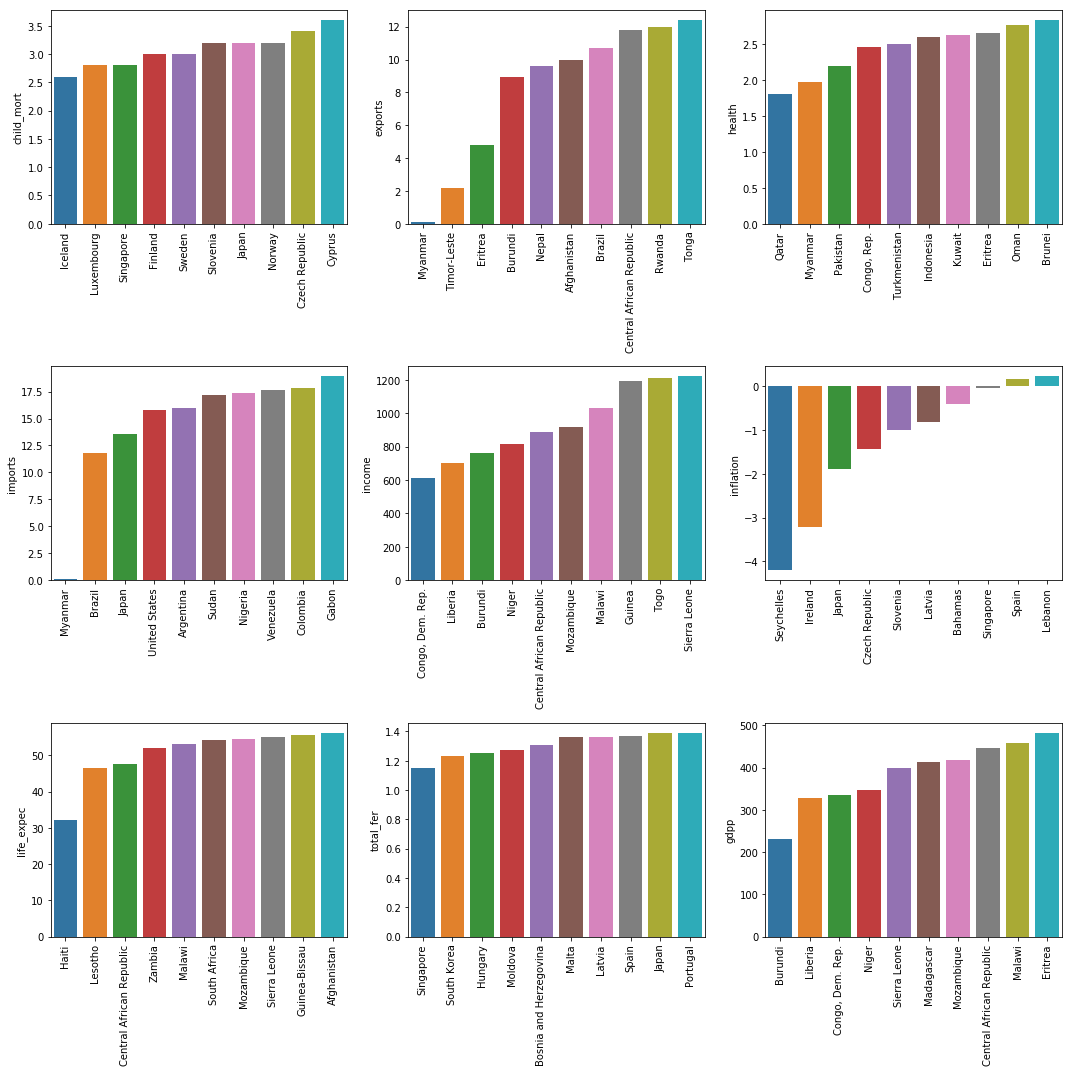

In [12]:
## Bivariate Analysis on all columns with country.

fig, axs = plt.subplots(3,3,figsize = (15,15))

j=0
k=0
for i in df_columns:
    df_bivariate = df_country[['country',i]].sort_values(i, ascending = True).head(10)
    plt1 = sns.barplot(x='country', y=i, data= df_bivariate,ax=axs[j,k])
    plt1.set(xlabel = '', ylabel= i)
    plt.show
    k+=1
    if k==3:
        j+=1
        k=0
        
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

- These plots are having lesser values in the columns i.e., ascending = True

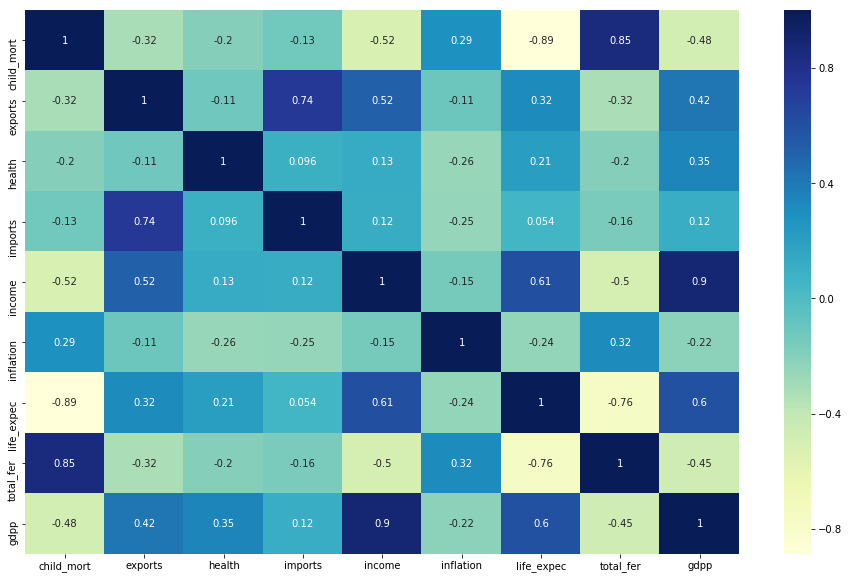

In [13]:
# Correlation among the varaibles

plt.figure(figsize = (16, 10))
sns.heatmap(df_country.corr(), annot = True, cmap="YlGnBu")
plt.savefig('HEATMAP')
plt.show()

#### Insights
- Child Mortality : Least in iceland and Highest in Haiti
- gdpp: Least in Burundi and highest in Luxemborg
- income : Least in Congo, Dem..Rep and Highest in Quatar

### STEP 2: PRINICIPAL COMPONENT ANALYSIS

In [14]:
## Pricinipal component analysis on all values
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
np_columns = standard_scaler.fit_transform(df_columns)

C:\Users\Ankita Rath\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ankita Rath\Anaconda4\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
np_columns

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [16]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [17]:
#Performing the PCA
pca.fit(np_columns)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [18]:
#List of PCA components.
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [19]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

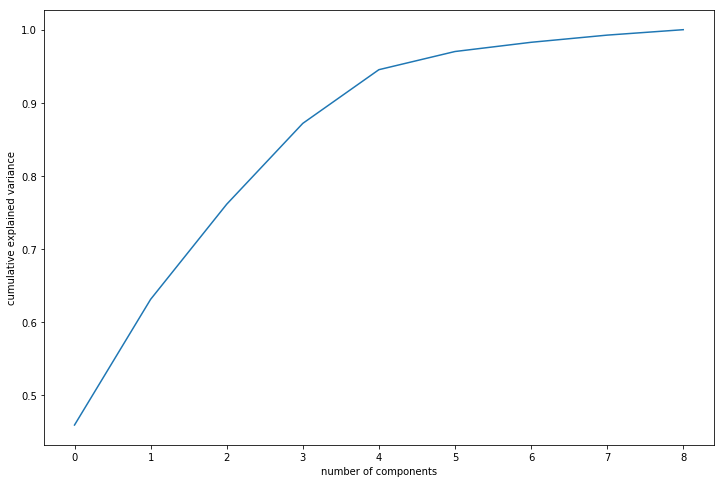

In [20]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [21]:
#Understanding how the original 4 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(df_columns.columns)
df_pcs = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
df_pcs

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.419519,0.192884,-0.029544,0.370653
1,exports,0.283897,0.613163,0.144761,0.003091
2,health,0.150838,-0.243087,-0.596632,0.461897
3,imports,0.161482,0.671821,-0.299927,-0.071907
4,income,0.398441,0.022536,0.301548,0.392159
5,inflation,-0.193173,-0.008404,0.642520,0.150442
6,life_expec,0.425839,-0.222707,0.113919,-0.203797
7,total_fer,-0.403729,0.155233,0.019549,0.378304
8,gdpp,0.392645,-0.046022,0.122977,0.531995


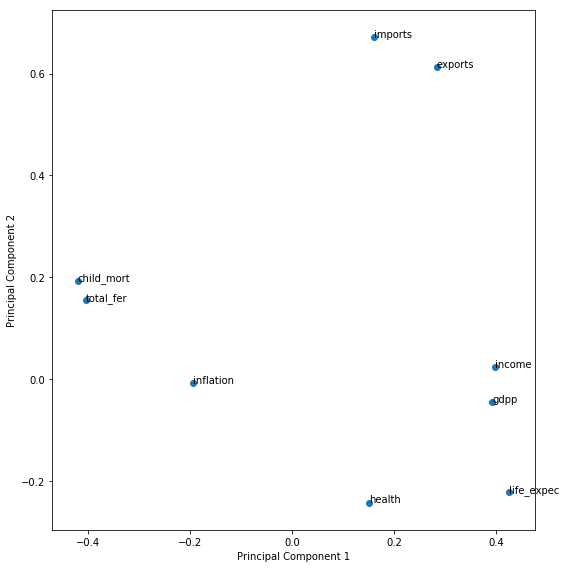

In [22]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pcs.PC1, df_pcs.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pcs.Feature):
    plt.annotate(txt, (df_pcs.PC1[i],df_pcs.PC2[i]))
plt.tight_layout()
plt.show()

In [23]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [24]:
df_pca = pca_final.fit_transform(np_columns)
df_pca.shape

(167, 4)

In [25]:
df_pca

array([[-2.91378654e+00,  8.83538878e-02,  7.21003195e-01,
         9.96698978e-01],
       [ 4.29357566e-01, -5.87858991e-01,  3.21052324e-01,
        -1.17119280e+00],
       [-2.82988288e-01, -4.46657168e-01, -1.22513541e+00,
        -8.50127000e-01],
       [-2.93096861e+00,  1.69943654e+00, -1.52173450e+00,
         8.75966440e-01],
       [ 1.03198760e+00,  1.30488006e-01,  1.92922430e-01,
        -8.44808058e-01],
       [ 2.84700248e-02, -1.75672051e+00, -7.93519995e-01,
        -5.24863850e-02],
       [-1.02848921e-01, -5.67475881e-01, -2.77668852e-01,
        -1.45832104e+00],
       [ 2.33945555e+00, -1.99811958e+00, -2.37052010e-01,
         1.13249032e+00],
       [ 2.97385881e+00, -7.34849467e-01,  5.48420918e-01,
         1.19256083e+00],
       [-1.80005999e-01, -3.93752233e-01, -8.64255214e-01,
        -4.26656606e-01],
       [ 1.26607427e+00, -6.65087633e-01,  4.53533102e-01,
         5.94788468e-02],
       [ 1.67073708e+00,  5.60394035e-01, -1.02016832e+00,
      

In [26]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [27]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [28]:
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [29]:
pcs_df2.shape

(167, 4)

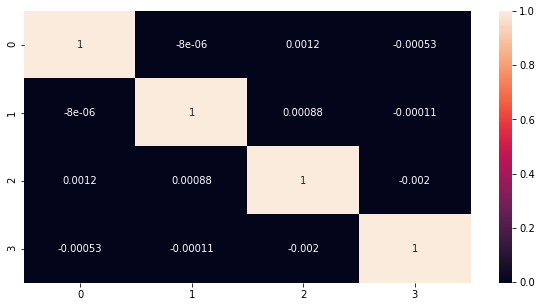

In [30]:
corrmat=np.corrcoef(pcs_df2.transpose())
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

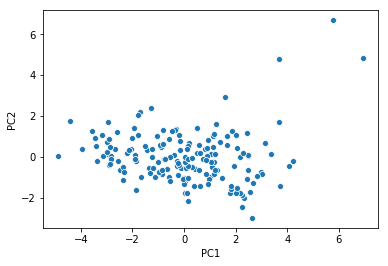

In [31]:
# First and second Prinicipal component

sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

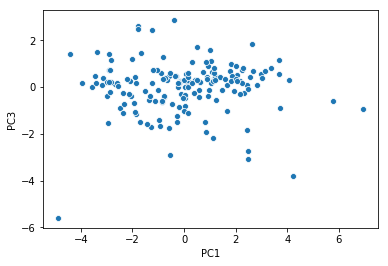

In [32]:
# First and third Principal component

sns.scatterplot(x='PC1',y='PC3',data=pcs_df2)

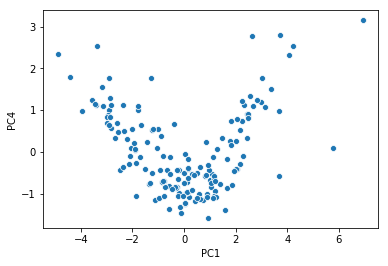

In [33]:
# First and Fourthh Principal component

sns.scatterplot(x='PC1',y='PC4',data=pcs_df2)

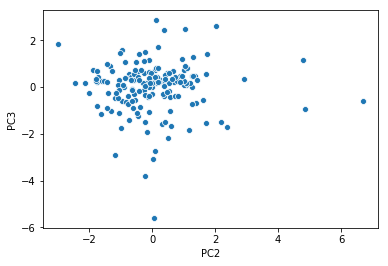

In [34]:
# Second and third Principal component

sns.scatterplot(x='PC2',y='PC3',data=pcs_df2)

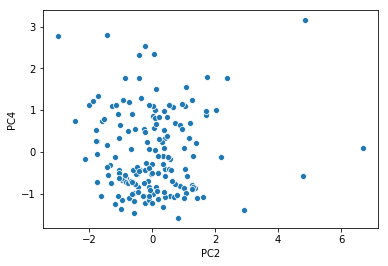

In [35]:
# Second and Fourth Principal component

sns.scatterplot(x='PC2',y='PC4',data=pcs_df2)

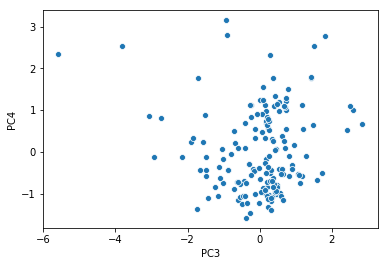

In [36]:
# Third and Fourth Principal component

sns.scatterplot(x='PC3',y='PC4',data=pcs_df2)

## HOPKINS TEST

In [37]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
#Let's check the average Hopkins measure
sum_1=0
for i in range(0,10):
    sum_1=sum_1+hopkins(pcs_df2)
print('Average Hopkins score is:',sum_1/10)

Average Hopkins score is: 0.8075757748908646


In [39]:
dat3=pcs_df2

In [40]:
#Code to do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3)
    sse_.append([k, silhouette_score(dat3, kmeans.labels_)])

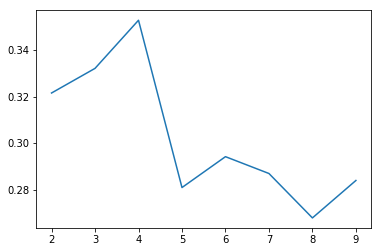

In [41]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

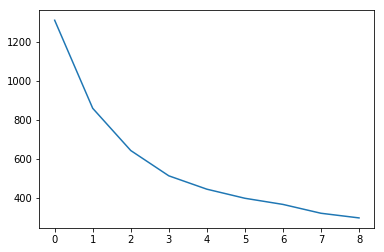

In [42]:
# Code to Elbow curve
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

- We can see that change of value after 4 number of components is very low. 

In [43]:
#Let's perform K means using K=4

model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(dat3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [44]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_columns)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_columns, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7256314906273207
For n_clusters=3, the silhouette score is 0.7003508054481694
For n_clusters=4, the silhouette score is 0.6109297437247547
For n_clusters=5, the silhouette score is 0.5734773443272871
For n_clusters=6, the silhouette score is 0.5887765000865469
For n_clusters=7, the silhouette score is 0.5944253756384579
For n_clusters=8, the silhouette score is 0.5964827694227414


In [45]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_fin = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_fin.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
dat_fin

,PC1,PC2,PC3,PC4,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,1
1,0.429358,-0.587859,0.321052,-1.171193,2
2,-0.282988,-0.446657,-1.225135,-0.850127,2
3,-2.930969,1.699437,-1.521734,0.875966,1
4,1.031988,0.130488,0.192922,-0.844808,2
5,0.028470,-1.756721,-0.793520,-0.052486,2
6,-0.102849,-0.567476,-0.277669,-1.458321,2
7,2.339456,-1.998120,-0.237052,1.132490,0
8,2.973859,-0.734849,0.548421,1.192561,0
9,-0.180006,-0.393752,-0.864255,-0.426657,2


In [46]:
dat_fin['ClusterID'].value_counts()

2    86
1    47
0    31
3     3
Name: ClusterID, dtype: int64

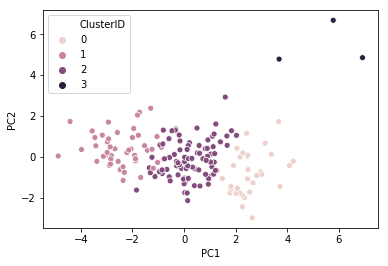

In [47]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_fin,)

In [48]:
dat_clustered=pd.merge(df_country,dat_fin, left_index=True,right_index=True)
dat_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429358,-0.587859,0.321052,-1.171193,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.930969,1.699437,-1.521734,0.875966,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808,2


In [49]:
dat_fin_clustered=dat_clustered.drop(['PC1','PC2','PC3','PC4'],axis=1)
dat_fin_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [50]:
avg_child_mort = pd.DataFrame(dat_fin_clustered.groupby(["ClusterID"]).child_mort.mean())

In [51]:
avg_child_mort

,child_mort
ClusterID,
0,4.903226
1,92.961702
2,21.598837
3,4.133333


In [52]:
avg_gdpp = pd.DataFrame(dat_fin_clustered.groupby(["ClusterID"]).gdpp.mean())

In [53]:
avg_gdpp

,gdpp
ClusterID,
0,42574.193548
1,1922.382979
2,6769.325581
3,57566.666667


In [54]:
avg_income = pd.DataFrame(dat_fin_clustered.groupby(["ClusterID"]).income.mean())

In [55]:
avg_income

,income
ClusterID,
0,44703.225806
1,3942.404255
2,12790.348837
3,64033.333333


### HIERIEIRCHAL CLUSTERING

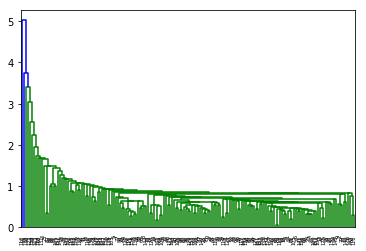

In [56]:
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

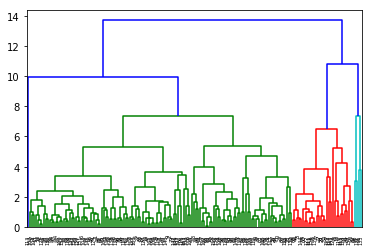

In [57]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [58]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters =4).reshape(-1,))
df_pca_hc = pd.concat([pd.DataFrame(df_pca),clusterCut ], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,0
1,0.429358,-0.587859,0.321052,-1.171193,0
2,-0.282988,-0.446657,-1.225135,-0.850127,0
3,-2.930969,1.699437,-1.521734,0.875966,0
4,1.031988,0.130488,0.192922,-0.844808,0


In [59]:
pca_cluster_hc = pd.concat([df_country['country'],df_pca_hc], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort= False, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,0
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0
3,Angola,-2.930969,1.699437,-1.521734,0.875966,0
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,0


In [60]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(df_country, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', '

In [62]:
pca_cluster_hc["ClusterID"].unique()

array([0, 1, 2, 3], dtype=int64)

In [63]:
hc_child_mort = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_exports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_health = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_imports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_income = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_inflation = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_life_expec = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_total_fer = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_gdpp = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [64]:
df_Hcluster = pd.concat([pd.Series(list(range(0,4))), hc_child_mort,hc_exports, hc_health, hc_imports,
               hc_income, hc_inflation, hc_life_expec,hc_total_fer,hc_gdpp], axis=1)
df_Hcluster.columns = ['ClusterId','child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
df_Hcluster

,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,46.137405,36.311443,6.417634,46.126457,9310.022901,8.090450,68.164122,3.206794,5222.015267
1,1,6.138710,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355
2,2,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45875.000000
3,3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


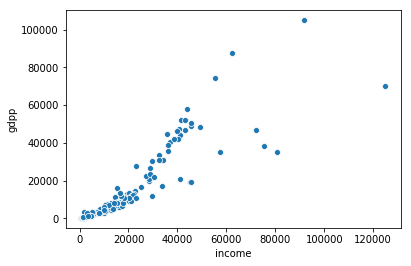

In [65]:
sns.scatterplot(x='income',y='gdpp',data=clustered_data_hc)

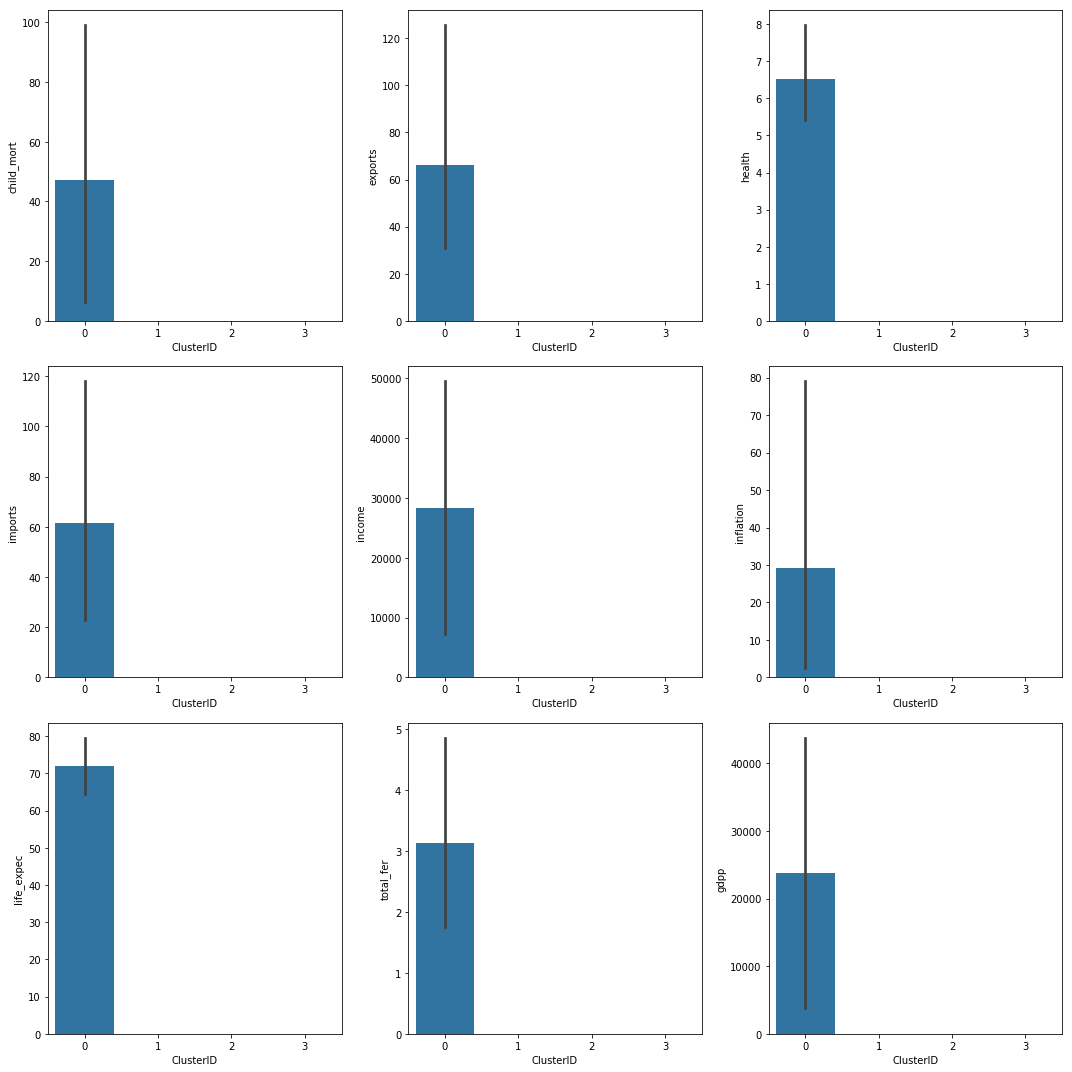

In [66]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

j=0
k=0
for i in df_columns.columns:
    sns.barplot(x=clustered_data_hc.ClusterID, y=df_Hcluster[i], ax = axs[j,k])
    k+=1
    if k==3:
        j+=1
        k=0
plt.tight_layout()

In [67]:
df_Hcluster

,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,46.137405,36.311443,6.417634,46.126457,9310.022901,8.090450,68.164122,3.206794,5222.015267
1,1,6.138710,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355
2,2,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45875.000000
3,3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


In [68]:
clustered_data_hc[(clustered_data_hc['child_mort']>90) & (clustered_data_hc['gdpp']<1000) & (clustered_data_hc['income']<3000)].country.values

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi',
       'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger',
       'Sierra Leone', 'Togo'], dtype=object)